In [62]:
import numpy as np
import pandas as pd
import xarray as xr

def datarray_coord_prop_test():
    temp = 15 + 8 * np.random.randn(2, 2, 3)
    precip = 10 * np.random.rand(2, 2, 3)
    lon = [[-99.83, -99.32], 
           [-99.79, -99.23]]
    lat = [[42.25, 42.21], 
           [42.63, 42.59]]


    ds = xr.Dataset(
             {
               "temperature": (["x", "y", "time"], temp),
                "precipitation": (["x", "y", "time"], precip),
               },
         coords={
                 "lon": (["x", "y"], lon),
                 "lat": (["x", "y"], lat),
                 "time": pd.date_range("2014-09-06", periods=3),
                 "reference_time": pd.Timestamp("2014-09-05"),
                },
        )

    ds.coords['lon'].attrs['long_name'] = 'longitude'
    ds.coords['lon'].attrs['coordinate'] = 'lat lon' #'x y' #
    #ds.coords['lon'].attrs['coordinate'] = 'y x' #
    ds.coords['lon'].attrs['axis'] = 'X' # 'x y' 
    ds.coords['lon'].attrs['units'] = 'degrees_east'
    ds.coords['lon'].attrs['standard_name'] = 'longitude'
    
    ds.coords['lat'].attrs['long_name'] = 'latitude'
    ds.coords['lat'].attrs['standard_name'] = 'latitude'
    ds.coords['lat'].attrs['axis'] = 'Y' # 'x y' 
    ds.coords['lat'].attrs['coordinate'] = 'lat lon' # 'x y' 
    #ds.coords['lat'].attrs['coordinate'] = 'y x' 
    ds.coords['lat'].attrs['units'] = 'degrees_north'
    ds.temperature.attrs['units'] = 'degrees_celsius'
    ds.precipitation.attrs['units'] = 'mm'

    
    assert(ds.temperature.coords['lat'].attrs == ds.coords['lat'].attrs)
    
    return ds

    
ds = datarray_coord_prop_test()

with xr.set_options(keep_attrs=True):
    datarray_coord_prop_test()


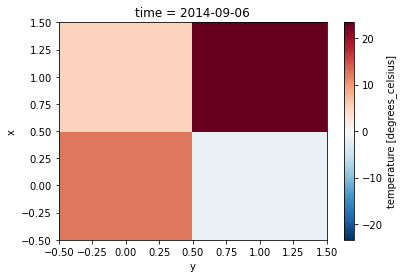

In [60]:
ds.temperature.drop('reference_time').isel(time=0).plot()

In [61]:
ds.isel(time=0).temperature

<xarray.DataArray 'temperature' (x: 2, y: 2)>
array([[12.46784566, -1.78948359],
       [ 5.31552565, 23.34159   ]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    time            datetime64[ns] 2014-09-06
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Attributes:
    units:    degrees_celsius

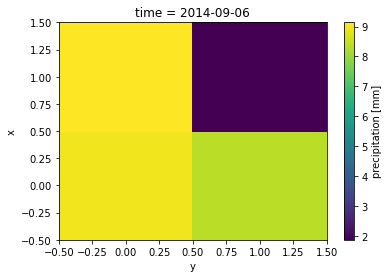

In [63]:
ds.precipitation.drop('reference_time').isel(time=0).plot()